In [1]:
import numpy as np
from sklearn.datasets import load_iris
data_iris = load_iris(as_frame=True)
display(data_iris.data)
print(data_iris.target)
print("Nilai Label : ", data_iris.target_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32
Nilai Label :  ['setosa' 'versicolor' 'virginica']


In [2]:
targets = (data_iris.target==2).astype(np.int8)
print(np.array(targets))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


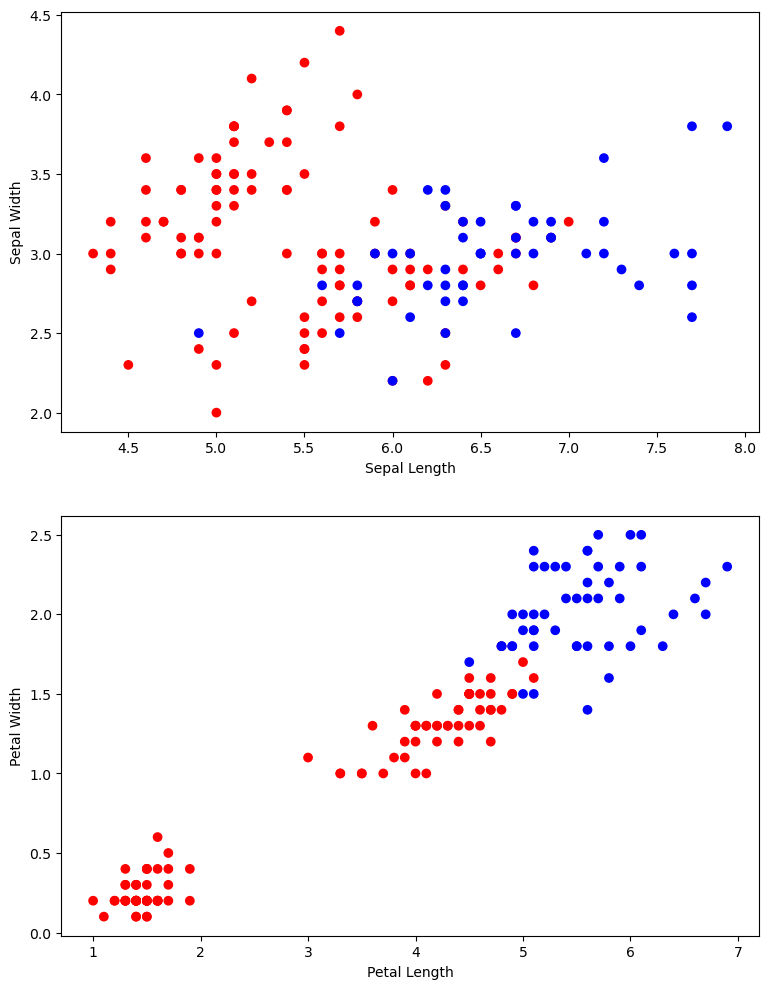

In [3]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(2, 1, figsize=(9,12))
colors = {0:'red', 1:'blue'}
ax1[0].scatter(data_iris.data.iloc[:,0],data_iris.data.iloc[:,1], c=targets.map(colors))
ax1[1].scatter(data_iris.data.iloc[:,2],data_iris.data.iloc[:,3], c=targets.map(colors))
ax1[0].set(xlabel="Sepal Length", ylabel='Sepal Width')
ax1[1].set(xlabel="Petal Length", ylabel='Petal Width')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = data_iris.data
y = data_iris.target
display(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25,random_state=0)
# Mencetak jumlah data latih dan data uji
print("Jumlah data latih : {} data".format(X_train.shape[0]))
print("Jumlah data uji : {} data".format(X_test.shape[0]))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32
Jumlah data latih : 112 data
Jumlah data uji : 38 data


In [7]:
from sklearn.linear_model import Perceptron
clf_p = Perceptron(max_iter=100, tol=0.001, eta0=0.1, random_state=0)
clf_p.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100)

In [8]:
print("Bobot Optimum: ", clf_p.coef_)
print("Bias: ", clf_p.intercept_)
print("Jumlah iterasi : ", clf_p.n_iter_)

Bobot Optimum:  [[ 0.25  0.48 -0.88 -0.43]
 [ 1.86 -4.2   1.29 -3.55]
 [-3.84 -3.07  6.36  5.42]]
Bias:  [ 0.1  2.4 -2.5]
Jumlah iterasi :  24


In [10]:
y_prediksi = clf_p.predict(X_test)
print("Target : ", np.array(y_test))
print("Prediksi Target : ", y_prediksi)

Target :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Prediksi Target :  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 2 1 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 2 2 2 0
 2]


Akurasi : 86.8421052631579 %


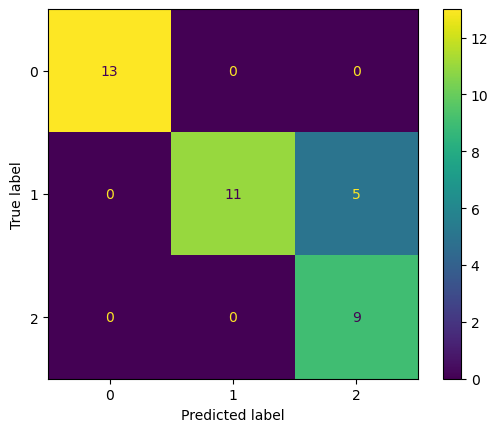

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))

In [12]:
y_prediksi_X = clf_p.predict([[6.7, 3, 5.2, 2.3]])
print("Prediksi jenis bunga iris : ", y_prediksi_X)

Prediksi jenis bunga iris :  [2]
